Image Preprocessing

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/ibm/Dataset/training_set",target_size=(64,64),class_mode="categorical",batch_size=30)

Found 5630 images belonging to 9 classes.


In [6]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/ibm/Dataset/test_set",target_size=(64,64),class_mode="categorical",batch_size=30)

Found 2243 images belonging to 9 classes.


Model Building

In [7]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [8]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(200,activation='relu'))
model.add(Dense(9,activation="softmax"))

In [13]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [14]:
len(x_train)

188

In [15]:
len(x_test)

75

In [16]:
model.fit(x_train,epochs=10,validation_data=x_test,steps_per_epoch=len(x_train)//10,validation_steps=len(x_test))

Epoch 1/10
18/18 [==============================] - 632s 37s/step - loss: 1.3196 - accuracy: 0.6519 - val_loss: 8.4948 - val_accuracy: 0.3081
Epoch 2/10
18/18 [==============================] - 91s 5s/step - loss: 0.2243 - accuracy: 0.9296 - val_loss: 8.4499 - val_accuracy: 0.4213
Epoch 3/10
18/18 [==============================] - 82s 5s/step - loss: 0.1294 - accuracy: 0.9630 - val_loss: 9.4157 - val_accuracy: 0.4458
Epoch 4/10
18/18 [==============================] - 72s 4s/step - loss: 0.0912 - accuracy: 0.9759 - val_loss: 10.1882 - val_accuracy: 0.4400
Epoch 5/10
18/18 [==============================] - 66s 4s/step - loss: 0.0682 - accuracy: 0.9815 - val_loss: 11.0673 - val_accuracy: 0.4400
Epoch 6/10
18/18 [==============================] - 61s 3s/step - loss: 0.0287 - accuracy: 0.9944 - val_loss: 12.0644 - val_accuracy: 0.4391
Epoch 7/10
18/18 [==============================] - 62s 3s/step - loss: 0.0397 - accuracy: 0.9868 - val_loss: 11.7206 - val_accuracy: 0.4440
Epoch 8/10
18/

In [17]:
model.save("aslpng.h5")

Testing the model

In [18]:
from keras.models import load_model
import numpy as np
import cv2

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

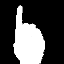

In [21]:
model=load_model("aslpng.h5")
img = image.load_img(r"/content/drive/MyDrive/ibm/Dataset/test_set/D/10.png",target_size=(64,64))
img

In [22]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [23]:
x.shape

(64, 64, 3)

In [24]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [25]:
pred = model.predict(x)

1/1 [==============================] - 0s 172ms/step


In [26]:
pred

array([[0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred.argmax(axis=1)[0]
pred_id

3

In [28]:
print("the alphabet is ",str(class_name[pred_id]))

the alphabet is  D
